# quantmod

In [1]:
options(warn=-1)
options("getSymbols.warning4.0"=FALSE)
suppressMessages(library(quantmod))

In [2]:
normalize_series <- function(xdat) xdat / coredata(xdat)[1]
symbol.list <- c('SCHG', 'SHOP')

In [3]:
getSymbols(symbol.list)

[1] "SCHG" "SHOP"

In [4]:
date.range <- '2018-05-01/2020-05-01'

## Delt - Calculate percent change

### Usage

```
Delt (x1, x2 = NULL, k = 0, type = c("arithmetic", "log"))
```

### Arguments

x1    mxl vector
x2    mxl vector
k     change over k-periods. default k=1 when x2 is NULL
type  type difference, log or arithmetic (default)

### Details

When called with only x1, the one period percent change of the series is returned by defualt. Internally this happens by copying x1 to x2. A two period difference would be specified with k=2.

If called with x1 and x2, the difference between the two is returned. That is, k=0. A one period difference would be specified by k=1. k may also be a vector to calculate more than one period at a time. The result would be an m x length(k).

Log differences are used by default: Lag = log(x2(t)/x1(t-k))

Arithmetic differences are calculated: Lag = (x2(t) - x1(t))/x1(t-k)

### Value

A matrix of length(x1) rows and length(k) columns.

In [5]:
Stock.Open <- Op(SCHG[date.range])
Stock.Close <- Cl(SCHG[date.range])

In [6]:
head(Delt(Stock.Open))

           Delt.1.arithmetic
2018-05-01                NA
2018-05-02      0.0090265516
2018-05-03     -0.0092211115
2018-05-04     -0.0008334213
2018-05-07      0.0227999444
2018-05-08     -0.0001359522

In [7]:
head(Delt(Stock.Open,Stock.Close,k=0:2))

           Delt.0.arithmetic Delt.1.arithmetic Delt.2.arithmetic
2018-05-01       0.006804583                NA                NA
2018-05-02      -0.004679383       0.004304930                NA
2018-05-03       0.002778219      -0.006468511       0.002499653
2018-05-04       0.018351175       0.017502459       0.008119956
2018-05-07       0.001766984       0.024607215       0.023753286
2018-05-08       0.002039165       0.001902936       0.024746267

## Lag - Lag a time series

Create a lagged series from data, with NA used to fill.

Lag(x, k=1)

Shift series k-periods down, perpetuating NAs to front of series.

Specifically designed to handle quantmod.OHLC and zoo series within quantmod workflow.

In [8]:
head(Lag(Stock.Close))

           Lag.1
2018-05-01    NA
2018-05-02 72.50
2018-05-03 72.32
2018-05-04 72.19
2018-05-07 73.25
2018-05-08 73.70

In [9]:
head(Lag(Stock.Close,k=0:2))

           Lag.0 Lag.1 Lag.2
2018-05-01 72.50    NA    NA
2018-05-02 72.32 72.50    NA
2018-05-03 72.19 72.32 72.50
2018-05-04 73.25 72.19 72.32
2018-05-07 73.70 73.25 72.19
2018-05-08 73.71 73.70 73.25

## Next - Advance a time series

Create a new time series advanced forward one period.

In [10]:
tail(Next(Stock.Close))

            Next
2020-04-24 89.79
2020-04-27 88.57
2020-04-28 91.39
2020-04-29 91.35
2020-04-30 89.02
2020-05-01    NA

In [11]:
tail(Next(Stock.Close,k=2))

            Next
2020-04-24 88.57
2020-04-27 91.39
2020-04-28 91.35
2020-04-29 89.02
2020-04-30    NA
2020-05-01    NA

## OHLC.Transformations - Extract and transform OHLC time series columns

Extract (transformed) data from sutiable OHLC object. Column names must contain the complete description - either "Open", "High", "Low", "Close", "Volume", or "Adjusted" - through may also contain additional characters. This is the default for objects returned from most getSymbols calls.
```
Cl(x)
Hi(x)
Lo(x)
Cl(x)
Vo(x)
Ad(x)

seriesHi(x)
seriesLo(x)

OpCl(x)
ClCl(x)
HiCl(x)
LoCl(x)
LoHi(x)
OpHi(x)
OpLo(x)
OpOp(x)

HLC(x)
OHLC(x)
```

In [12]:
head(Cl(Stock.Close))

           SCHG.Close
2018-05-01      72.50
2018-05-02      72.32
2018-05-03      72.19
2018-05-04      73.25
2018-05-07      73.70
2018-05-08      73.71

## TA - Add technical indicator to chart

The general mechanism to add technical analysis studies or overlays to a financial chart created with chartSeries.

Functionalities marked with a '*' is added via the __TTR__ package.
```
addTA - add data as a custom indicator.
dropTA - remove technical indicator.
moveTA - move technical indicator.
swapTA - swap two technical indicators.

Current technical indicators include:

addADX - add Welles Wilder's directional movement indicator*
addATR - average true range*
addBBands - add Bollinger Bands*
addCCI - add commodity channel index*
addCMF - add Chaiken money flow*
addCMO - add Chande Momentum Oscillator*
addDEMA - add Double Exponential Moving Average*
addDPO - add Detrended Price Oscillator*
addEMA - add Exponential Moving Average*
addEnvelope - add moving average envelope*
addEVWMA - add exponential volume weighted moving average*
addExpiry - add options or futures expiration lines
addLines - add lines
addMACD - add moving average convergence divergence
addMomentum - add Momentum*
addPoints - add point(s)
addROC - add rate of change*
addRSI - add relative strength indicator*
addSAR - add parabolic SAR*
addSMA - add simple moving average*
addSMI - add Stochastic momentum index*
addTRIX - add triple smoothed exponential oscillator*
addVo - add volume if available
addWMA - add weighted moving average*
addWPR - add Williams percent R*
addZLEMA - add ZLEMA*
```

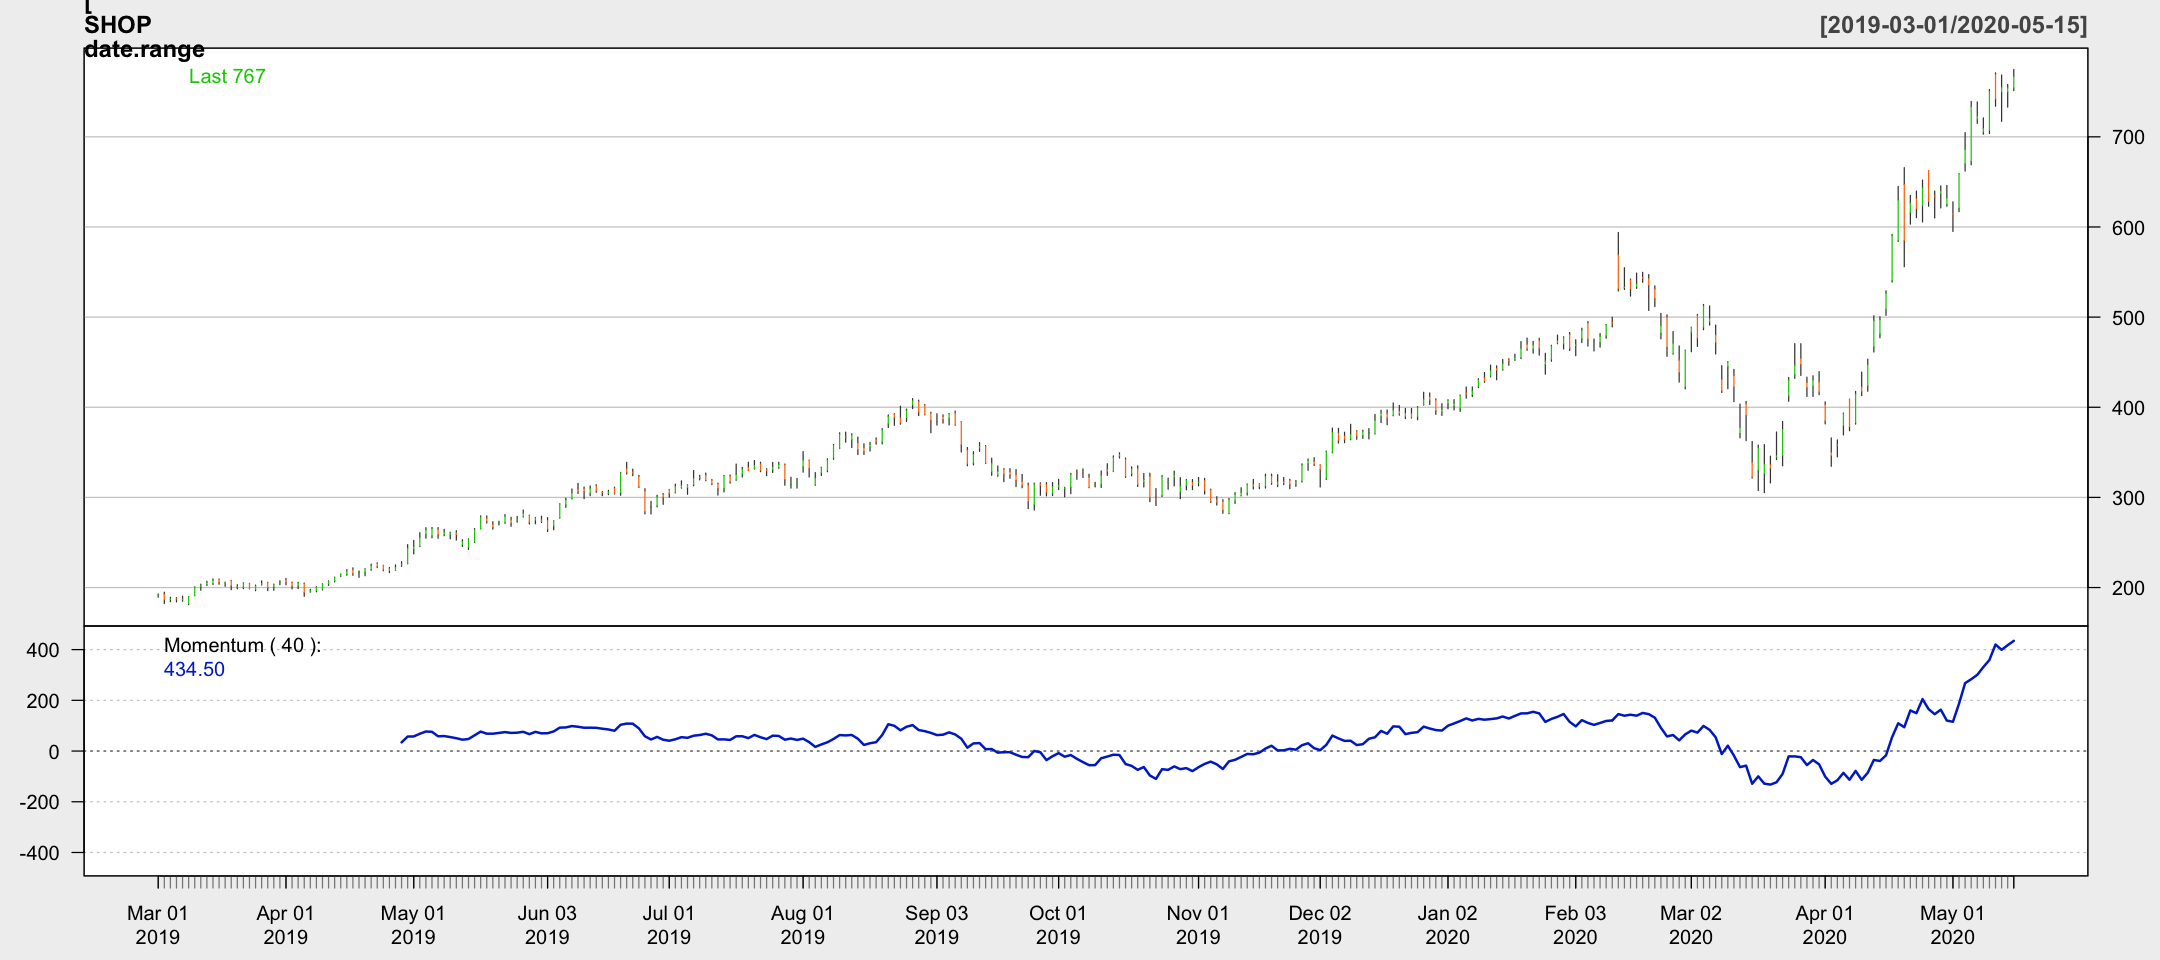

In [47]:
date.range <- '2019-03-01/'
options(repr.plot.width=18, repr.plot.height=8)
#par(mfrow=c(3,1))
myTheme = chart_theme()
myTheme$col$line.col = "blue"
myTheme$rylab = TRUE
myTheme$lylab = FALSE
myPars = chart_pars()
myPars$cex = 1.3
chartSeries(SHOP[date.range],
    theme=chartTheme('white'),
    TA=c("addMomentum(n=40)"))